In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets
import matplotlib.pyplot as plt

from s7_datasets import load_data_S7_1
from models import model_summary,S7_Model_1
from utils import train_S7,test_S7,plot_acc_loss_S7

c:\Users\Aai\anaconda3\envs\pytorch\Lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
c:\Users\Aai\anaconda3\envs\pytorch\Lib\site-packages\transformers\utils\generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [3]:
use_cuda = torch.cuda.is_available()  # Check if CUDA (GPU support) is available
device = torch.device("cuda" if use_cuda else "cpu")  # Select GPU if available, otherwise fall back to CPU
device  # Display the selected device

device(type='cpu')

In [4]:
trainloader , testloader = load_data_S7_1()

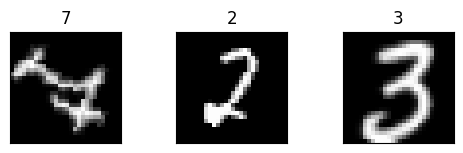

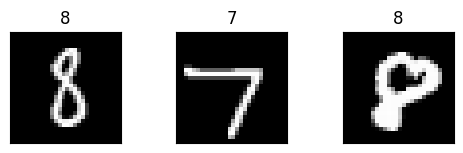

In [5]:
def plot_image(loader,no_images):
    batch_data, batch_label = next(iter(loader))
    _ = plt.figure()

    for i in range(no_images):
        plt.subplot(3,4,i+1)
        plt.tight_layout()
        plt.imshow(batch_data[i].squeeze(0), cmap='gray')
        plt.title(batch_label[i].item())
        plt.xticks([])
        plt.yticks([])


plot_image(trainloader,3)
plot_image(testloader,3)

In [6]:

model = S7_Model_1()
model_summary(model,input_size=(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]           1,568
       BatchNorm2d-2           [-1, 32, 28, 28]              64
              ReLU-3           [-1, 32, 28, 28]               0
         MaxPool2d-4           [-1, 32, 14, 14]               0
            Conv2d-5           [-1, 28, 14, 14]           8,092
       BatchNorm2d-6           [-1, 28, 14, 14]              56
              ReLU-7           [-1, 28, 14, 14]               0
            Conv2d-8           [-1, 16, 14, 14]           4,048
       BatchNorm2d-9           [-1, 16, 14, 14]              32
             ReLU-10           [-1, 16, 14, 14]               0
        MaxPool2d-11             [-1, 16, 7, 7]               0
           Conv2d-12              [-1, 8, 7, 7]           1,160
      BatchNorm2d-13              [-1, 8, 7, 7]              16
             ReLU-14              [-1, 

In [7]:
model = S7_Model_1().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 15




for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train_S7(model, device, trainloader, optimizer,criterion)
  test_S7(model, device, testloader, criterion)
  scheduler.step()


c:\Users\Aai\anaconda3\envs\pytorch\Lib\site-packages\torch\optim\lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch 1


Train: Loss=0.1322 Batch_id=937 Accuracy=78.76: 100%|██████████| 938/938 [00:37<00:00, 25.29it/s]


Test set: Average loss: 0.0017, Accuracy: 9695/10000 (96.95%)

Epoch 2


Train: Loss=0.2019 Batch_id=937 Accuracy=96.28: 100%|██████████| 938/938 [00:35<00:00, 26.22it/s]


Test set: Average loss: 0.0010, Accuracy: 9791/10000 (97.91%)

Epoch 3


Train: Loss=0.2893 Batch_id=937 Accuracy=97.06: 100%|██████████| 938/938 [00:56<00:00, 16.71it/s]


Test set: Average loss: 0.0008, Accuracy: 9837/10000 (98.37%)

Epoch 4


Train: Loss=0.0912 Batch_id=937 Accuracy=97.39: 100%|██████████| 938/938 [01:25<00:00, 10.98it/s]


Test set: Average loss: 0.0006, Accuracy: 9879/10000 (98.79%)

Epoch 5


Train: Loss=0.0493 Batch_id=937 Accuracy=97.69: 100%|██████████| 938/938 [02:19<00:00,  6.73it/s]


Test set: Average loss: 0.0007, Accuracy: 9869/10000 (98.69%)

Epoch 6


Train: Loss=0.0069 Batch_id=937 Accuracy=98.27: 100%|██████████| 938/938 [03:06<00:00,  5.04it/s]


Test set: Average loss: 0.0004, Accuracy: 9915/10000 (99.15%)

Epoch 7


Train: Loss=0.0140 Batch_id=937 Accuracy=98.44: 100%|██████████| 938/938 [03:11<00:00,  4.89it/s]


Test set: Average loss: 0.0004, Accuracy: 9911/10000 (99.11%)

Epoch 8


Train: Loss=0.0031 Batch_id=937 Accuracy=98.59: 100%|██████████| 938/938 [03:09<00:00,  4.96it/s]


Test set: Average loss: 0.0004, Accuracy: 9915/10000 (99.15%)

Epoch 9


Train: Loss=0.1167 Batch_id=937 Accuracy=98.57: 100%|██████████| 938/938 [03:08<00:00,  4.97it/s]


Test set: Average loss: 0.0004, Accuracy: 9914/10000 (99.14%)

Epoch 10


Train: Loss=0.0362 Batch_id=937 Accuracy=98.58: 100%|██████████| 938/938 [03:06<00:00,  5.02it/s]


Test set: Average loss: 0.0004, Accuracy: 9915/10000 (99.15%)

Epoch 11


Train: Loss=0.1635 Batch_id=937 Accuracy=98.61: 100%|██████████| 938/938 [03:03<00:00,  5.11it/s]


Test set: Average loss: 0.0004, Accuracy: 9921/10000 (99.21%)

Epoch 12


Train: Loss=0.0041 Batch_id=937 Accuracy=98.65: 100%|██████████| 938/938 [03:03<00:00,  5.12it/s]


Test set: Average loss: 0.0004, Accuracy: 9923/10000 (99.23%)

Epoch 13


Train: Loss=0.0020 Batch_id=937 Accuracy=98.68: 100%|██████████| 938/938 [03:06<00:00,  5.03it/s]


Test set: Average loss: 0.0004, Accuracy: 9919/10000 (99.19%)

Epoch 14


Train: Loss=0.0394 Batch_id=937 Accuracy=98.70: 100%|██████████| 938/938 [03:15<00:00,  4.80it/s]


Test set: Average loss: 0.0004, Accuracy: 9923/10000 (99.23%)

Epoch 15


Train: Loss=0.0128 Batch_id=937 Accuracy=98.62: 100%|██████████| 938/938 [02:53<00:00,  5.40it/s]


Test set: Average loss: 0.0004, Accuracy: 9922/10000 (99.22%)



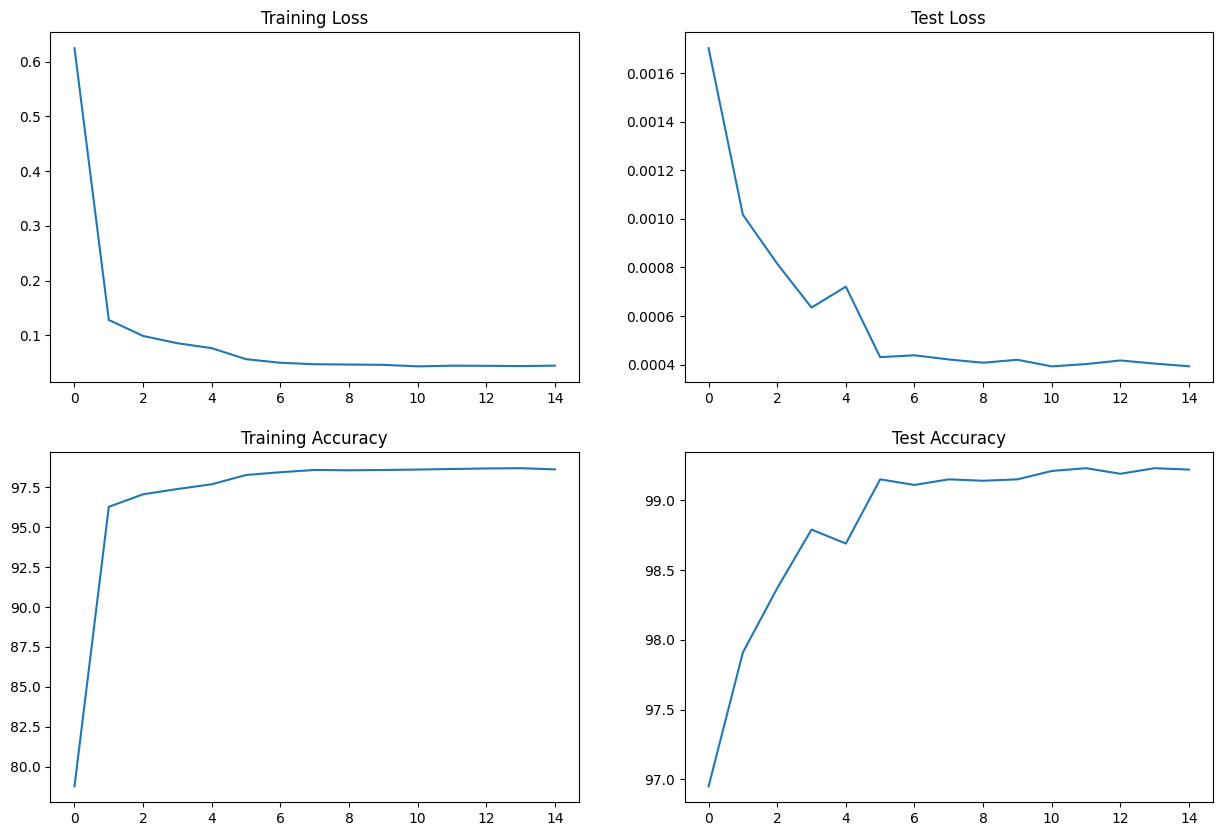

In [8]:
plot_acc_loss_S7()